## High level overview 

This is a high level over of the process.

```mermaid
flowchart 
    subgraph Generative Model
        EX["Generative Model"]
        ProblemSpecific(("Problem 
        Specific"))
        FactorGraph[Factor Graph]
        EX --> FactorGraph
    end
    subgraph Inference
        General(("General"))
        Inf["Inference"]
        Act["Action Selection"]
        Learn["Learning"]
    end
    FactorGraph --> Inf
    FactorGraph --> Act
    FactorGraph --> Learn
```

For our problem, we need to have a generative model. A client will come up with a generative model. 

A generative model represents a joint probability distribution of a set of random variables. 

$$
\text{Generative Model} \quad \large P(X_1, X_2, ..., X_n)
$$

A generative model is useful if it can use the structure of the problem to factorize the joint probability distribution. We call this process **factorization**. A client will come up with the factorization.  

## Bayesian Network 

A **Graphical model** (BN) a generative model which specifies a joint distribution over $X$ as a product of local conditional distributions, one for each node:

$$
\large P(X_1=x_1, ..., X_n =x_n) = \prod_{i=1}^np(X_i|X_{Parent(i)})
$$

where $X_{Parent(i)}$ denotes the set of nodes that point towards node $X_i$ in the graph.

For example, consider this Bayesian Network given bellow.  

```mermaid
flowchart LR;
    A[x1]; 
    B[x2];
    A --> B;
    A --> C[x3];
    B --> C
    C --> D[x4];
    C --> E[x5];
```
 
We can write the joint probability corresponding this this Bayesian network as

$$
\large p(X_1, X_2, ..., X_5) = p(X_1)P(X2|X_1)P(X3|X1, X2) P(X4|X3) P(X5|X3)
$$

## Probabilistic Inference 
An essential aspect of generative models is their utility in enabling **probabilistic inference**. 

Let $X= \{X_1, X_2, ..., X_n\}$ be a set of random variables and $P(X_{1:n})$ be a joint probability distribution function. Given **evidence** $E \subseteq X$, and a **query** $Q \subseteq X$, we express probabilistic inference as:

$$
\large {P}(Q|E=e)
$$ 

For example, let us define a generative model by $P(X_1, X_2, X_3, X_4)$, we can then define the following inference problems:

- $P(X_1, X_2|X_3=5)$   
- $p(X_1)$


## Learning 

Learning refers to parameter estimation. 

This problem simply aims to learn the parameters (conditional probabilities) of the model from data.

Data refers to samples/observation for each random variable. 

## A few more notes!

- Our objective is to **validate** the results of the genius software by comparing them with other open-source alternatives. The goal is not a computational comparison at this stage.
- Graphical models represent just one category of generative models. However, they are sufficient for our purpose. This is because a client will come up with a generative model and factor graph (not us) at this stage.
- It is beneficial to establish an accepted "universal" template for the factor graph. Once this is done, we can convert this graph into a format compatible with genius and perform inference and learning processes.
- In the meantime, because our key goal is to validate the results, we decided to test this process with a BIF format. 

In [22]:
import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd 

from pgmpy.utils import get_example_model
from pgmpy.inference import BeliefPropagation

from IPython.display import display, Image
%config IPCompleter.greedy=True

**Problem Description:** The following graphical model models respiratory diseases based on observed symptoms and risk factors. Given a set of symptoms reported by a patient, the model should predict the likelihood of various respiratory diseases.

- Visit to Asia (VisitAsia): This variable represents whether a person has visited Asia recently. It's a binary variable, taking on values True or False. 

- Tuberculosis (Tub): This variable represents whether a person has Tuberculosis. It's a binary variable, taking on values True or False.

- Smoking (Smoke): This variable represents whether a person smokes. It's a binary variable, taking on values True or False.

- Lung Cancer (Lung): This variable represents whether a person has Lung Cancer. It's a binary variable, taking on values True or False.

- Bronchitis (Bronc): This variable represents whether a person has Bronchitis. It's a binary variable, taking on values True or False.

- Positive X-ray (Xray): This variable represents whether a person's X-ray result is positive. It's a binary variable, taking on values True or False.

- Dyspnea (Dysp): This variable represents whether a person experiences difficulty in breathing (Dyspnea). It's a binary variable, taking on values True or False.

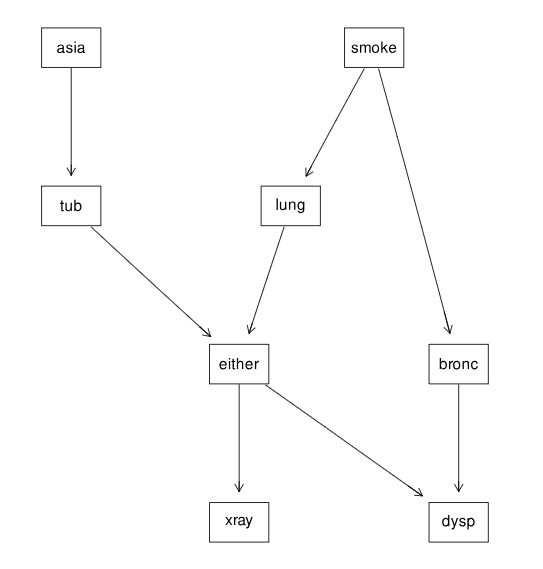

In [23]:
display(Image(filename='./images/asia.png'))

In [31]:
# BIF Input. Here we use BIF input. In general, we need to use 
# a factor graph represented in a "universal" template 
model = get_example_model('asia')

bif_file_path = 'asia.bif'

with open(bif_file_path, 'r') as file:
    for line in file:
        print(line.strip())

network unknown {
}
variable asia {
type discrete [ 2 ] { yes, no };
}
variable tub {
type discrete [ 2 ] { yes, no };
}
variable smoke {
type discrete [ 2 ] { yes, no };
}
variable lung {
type discrete [ 2 ] { yes, no };
}
variable bronc {
type discrete [ 2 ] { yes, no };
}
variable either {
type discrete [ 2 ] { yes, no };
}
variable xray {
type discrete [ 2 ] { yes, no };
}
variable dysp {
type discrete [ 2 ] { yes, no };
}
probability ( asia ) {
table 0.01, 0.99;
}
probability ( tub | asia ) {
(yes) 0.05, 0.95;
(no) 0.01, 0.99;
}
probability ( smoke ) {
table 0.5, 0.5;
}
probability ( lung | smoke ) {
(yes) 0.1, 0.9;
(no) 0.01, 0.99;
}
probability ( bronc | smoke ) {
(yes) 0.6, 0.4;
(no) 0.3, 0.7;
}
probability ( either | lung, tub ) {
(yes, yes) 1.0, 0.0;
(no, yes) 1.0, 0.0;
(yes, no) 1.0, 0.0;
(no, no) 0.0, 1.0;
}
probability ( xray | either ) {
(yes) 0.98, 0.02;
(no) 0.05, 0.95;
}
probability ( dysp | bronc, either ) {
(yes, yes) 0.9, 0.1;
(no, yes) 0.7, 0.3;
(yes, no) 0.8, 0.2;

# **Inference** 

In [50]:
bp = BeliefPropagation(model)

# Suppose, I want to know the probability of xray given the evidence that I observed lung cancer.
query_result = bp.query(variables=["xray"], evidence={"lung": 1})
print(query_result)

# Suppose, I want to know the probability of lung cancer given the evidence that I observed positive xray.
query_result = bp.query(variables=["lung"], evidence={"xray": 1})
print(query_result)

# suppose, I want to know the probability of dysp without having any evidence 
query_result = bp.query(variables=["dysp"])
print(query_result)

# Suppose I want to know the probability if lung cancer given a mixture of evidence 
query_result = bp.query(variables=["lung", "smoke"], evidence={"xray": 1, "asia":"yes"})
print(query_result)


+---------+-------------+
| xray    |   phi(xray) |
+=========+=============+
| xray(0) |      0.0597 |
+---------+-------------+
| xray(1) |      0.9403 |
+---------+-------------+
+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0012 |
+---------+-------------+
| lung(1) |      0.9988 |
+---------+-------------+
+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(yes) |      0.4360 |
+-----------+-------------+
| dysp(no)  |      0.5640 |
+-----------+-------------+
+---------+------------+-------------------+
| lung    | smoke      |   phi(lung,smoke) |
+=========+============+===================+
| lung(0) | smoke(yes) |            0.0012 |
+---------+------------+-------------------+
| lung(0) | smoke(no)  |            0.0001 |
+---------+------------+-------------------+
| lung(1) | smoke(yes) |            0.4756 |
+---------+------------+-------------------+
| lung(1) | smoke(no)  |           

# **Learning** 

In [52]:
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator

In [53]:
asia_model = get_example_model('asia')

edges = asia_model.edges()
nodes = asia_model.nodes()

values = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, len(nodes))),
                      columns=nodes)

estimator = MaximumLikelihoodEstimator(asia_model, values)

print(estimator.get_parameters())

for cpd in estimator.get_parameters():
    print(cpd)

[<TabularCPD representing P(asia:2) at 0x2b19426e250>, <TabularCPD representing P(tub:2 | asia:2) at 0x2b1a484b2d0>, <TabularCPD representing P(smoke:2) at 0x2b1a4837d50>, <TabularCPD representing P(lung:2 | smoke:2) at 0x2b19ffc0250>, <TabularCPD representing P(bronc:2 | smoke:2) at 0x2b19a6c44d0>, <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x2b1a39e52d0>, <TabularCPD representing P(xray:2 | either:2) at 0x2b1a39e6610>, <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x2b1a39e72d0>]
+---------+-------+
| asia(0) | 0.488 |
+---------+-------+
| asia(1) | 0.512 |
+---------+-------+
+--------+---------------------+-----------+
| asia   | asia(0)             | asia(1)   |
+--------+---------------------+-----------+
| tub(0) | 0.49385245901639346 | 0.4921875 |
+--------+---------------------+-----------+
| tub(1) | 0.5061475409836066  | 0.5078125 |
+--------+---------------------+-----------+
+----------+-------+
| smoke(0) | 0.521 |
+----------+-------+
| smoke(1)